In [2]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
from numpy.linalg import svd
import pandas as pd


In [3]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()


In [4]:
print(X_test.shape)
print(X_test)

(10000, 28, 28)
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


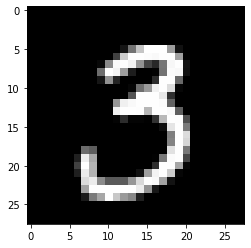

In [5]:
plt.imshow(X_test[90],cmap="gray")

In [6]:
Y_test[90]

3

In [7]:
X=X_test.reshape(-1,28*28)
Y=Y_test

In [8]:
sc=StandardScaler()

In [9]:
X_=sc.fit_transform(X)


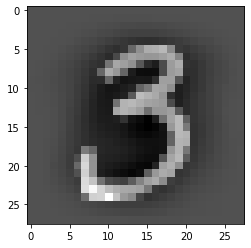

In [10]:
plt.imshow(X_[90].reshape(28,28),cmap="gray")

In [29]:
pca=PCA(n_components=784)
print(X_.shape)
z_pca=pca.fit_transform(X_)
print(z_pca.shape)
z_pca=z_pca[90]
plt.imshow(z_pca.reshape(28,-1),cmap="gray")

(10000, 784)
(784,)


ValueError: cannot reshape array of size 1 into shape (28,newaxis)

In [66]:
z_pca


array([[-5.45831116,  6.41400668, -4.19942366, ..., -0.40111971,
        -0.10430381, -0.23173969],
       [ 2.80443233, -8.02885014, 16.18577955, ..., -0.71848952,
        -0.33241147,  0.11695089],
       [-7.41124146, -3.86404387,  1.08959777, ..., -0.12654194,
        -0.1335916 ,  0.1598492 ],
       ...,
       [-5.00435204,  1.15364641, -5.01710348, ...,  0.14934863,
         0.07789496, -0.05334331],
       [-1.42085442, -4.42308066, -7.00728815, ..., -0.30782508,
        -0.18298915, -0.4574408 ],
       [13.14268302, -4.26280299, -1.14624747, ..., -0.21120294,
         0.07414575, -0.60346412]])

In [48]:
pca.explained_variance_

array([41.39893398, 28.35105784, 27.01964636, 21.58249779])

In [62]:
print(X_)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [67]:
covar=np.dot(X_.T,X_)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [51]:
U,S,V=svd(covar)
Ured=U[:,:2]
Ured

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [68]:
z=np.dot(X_,Ured)


[[  5.45831116  -6.41400668]
 [ -2.80443233   8.02885014]
 [  7.41124146   3.86404387]
 ...
 [  5.00435204  -1.15364641]
 [  1.42085442   4.42308066]
 [-13.14268302   4.26280299]]


In [56]:
new_dataset=np.hstack((z,Y.reshape(-1,1)))
dataframe=pd.DataFrame(new_dataset,columns=["PC1","PC2","label"])

In [57]:
dataframe

,PC1,PC2,label
0,5.458311,-6.414007,7.0
1,-2.804432,8.028850,2.0
2,7.411241,3.864044,1.0
3,-8.751242,-0.045991,0.0
4,0.065756,-6.296290,4.0
...,...,...,...
9995,-3.579478,3.367965,2.0
9996,-3.244816,1.981771,3.0
9997,5.004352,-1.153646,4.0
9998,1.420854,4.423081,5.0


In [ ]:
import seaborn as sns

plt.figure